In [1]:
#Attempt1
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN', 'NAME' and 'CLASSIFICATION'.
application_df=application_df.drop(['EIN','NAME','CLASSIFICATION'],1)

C:\Users\dadda\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [3]:
# Determine the number of unique values in each column.
print(application_df.nunique())

APPLICATION_TYPE            17
AFFILIATION                  6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [4]:
# Look at APPLICATION_TYPE value counts for binning
APPLICATION_TYPE = application_df.APPLICATION_TYPE.value_counts()
APPLICATION_TYPE

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

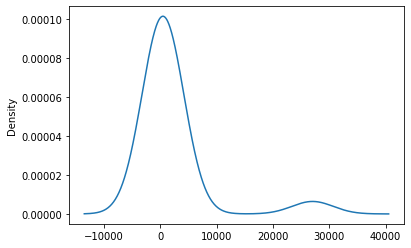

In [5]:
# Visualize the value counts of APPLICATION_TYPE
APPLICATION_TYPE.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_APPLICATION_TYPE = list(APPLICATION_TYPE[APPLICATION_TYPE<500].index)

# # Replace in dataframe
for app in replace_APPLICATION_TYPE:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")

# # Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at INCOME_AMT value counts for binning
INCOME_AMT = application_df.INCOME_AMT.value_counts()
INCOME_AMT

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

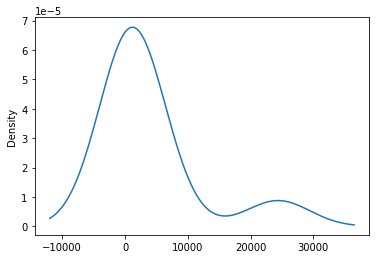

In [8]:
# Visualize the value counts of INCOME_AMT
INCOME_AMT.plot.density()

<AxesSubplot:ylabel='Density'>

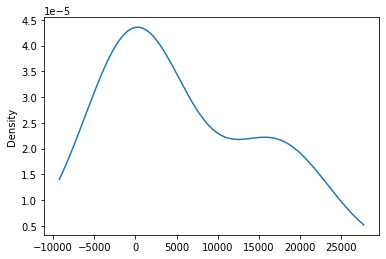

In [9]:
# Look at AFFILIATION value counts for binning
AFFILIATION = application_df.AFFILIATION.value_counts()
# Visualize the value counts of AFFILIATION
AFFILIATION.plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
replace_class = list(AFFILIATION[AFFILIATION<1000].index)
# Replace in dataframe
for cls in replace_class:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [11]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\dadda\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True,right_index=True).drop(columns = application_cat)
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\dadda\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Define the model_Deep Neural Net.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                2800      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,261
Trainable params: 5,261
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/100
25056/25724 [============================>.] - ETA: 0s - loss: 0.5831 - acc: 0.7162
Epoch 00001: saving model to checkpoints/weights.01.hdf5
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5821 - acc: 0.7170
Epoch 2/100
24992/25724 [============================>.] - ETA: 0s - loss: 0.5715 - acc: 0.7260
Epoch 00002: saving model to checkpoints/weights.02.hdf5
25724/25724 [==============================] - 1s 24us/sample - loss: 0.5716 - acc: 0.7256
Epoch 3/100
25408/25724 [============================>.] - ETA: 0s - loss: 0.5688 - acc: 0.7274
Epoch 00003: saving model to checkpoints/weights.03.hdf5
25724/25724 [==============================] - 1s 24us/sample - loss: 0.5690 - acc: 0.7271
Epoch 4/100
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5686 - acc: 0.7270
Epoch 00004: saving model to checkpoints/weights.04.hdf5
25724/25724 [==============================] - 1s 25us/sample - loss: 0.5690 - acc: 0.7266
E

25724/25724 [==============================] - 1s 23us/sample - loss: 0.5604 - acc: 0.7307
Epoch 68/100
24256/25724 [===========================>..] - ETA: 0s - loss: 0.5607 - acc: 0.7301
Epoch 00068: saving model to checkpoints/weights.68.hdf5
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5605 - acc: 0.7304
Epoch 69/100
24960/25724 [============================>.] - ETA: 0s - loss: 0.5603 - acc: 0.7315
Epoch 00069: saving model to checkpoints/weights.69.hdf5
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5605 - acc: 0.7314
Epoch 70/100
24480/25724 [===========================>..] - ETA: 0s - loss: 0.5603 - acc: 0.7313
Epoch 00070: saving model to checkpoints/weights.70.hdf5
25724/25724 [==============================] - 1s 23us/sample - loss: 0.5602 - acc: 0.7313
Epoch 71/100
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5603 - acc: 0.7313
Epoch 00071: saving model to checkpoints/weights.71.hdf5
25724/25724 [=======

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5717 - acc: 0.7216
Loss: 0.5717209677098444, Accuracy: 0.7216326594352722


In [24]:
# Save and export your results to an HDF5 file
nn.save("AlphabetSoupCharity_Attempt1.h5")

In [25]:
#Attempt 2: More neurons being added to hidden layers and additional Layers



In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                2800      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 5,551
Trainable params: 5,551
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization_add_layer/", exist_ok=True)
checkpoint_path = "checkpoints_optimization_add_layer/weights.{epoch:02d}hdf5"

In [29]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/100
23648/25724 [==========================>...] - ETA: 0s - loss: 0.5817 - acc: 0.7194
Epoch 00001: saving model to checkpoints_optimization_add_layer/weights.01hdf5
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5807 - acc: 0.7198
Epoch 2/100
25088/25724 [============================>.] - ETA: 0s - loss: 0.5716 - acc: 0.7247
Epoch 00002: saving model to checkpoints_optimization_add_layer/weights.02hdf5
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5705 - acc: 0.7257
Epoch 3/100
24928/25724 [============================>.] - ETA: 0s - loss: 0.5687 - acc: 0.7269
Epoch 00003: saving model to checkpoints_optimization_add_layer/weights.03hdf5
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5690 - acc: 0.7266
Epoch 4/100
23904/25724 [==========================>...] - ETA: 0s - loss: 0.5677 - acc: 0.7261
Epoch 00004: saving model to checkpoints_optimization_add_layer/weights.04hdf5
2572

Epoch 32/100
24224/25724 [===========================>..] - ETA: 0s - loss: 0.5622 - acc: 0.7298
Epoch 00032: saving model to checkpoints_optimization_add_layer/weights.32hdf5
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5620 - acc: 0.7301
Epoch 33/100
24608/25724 [===========================>..] - ETA: 0s - loss: 0.5611 - acc: 0.7311
Epoch 00033: saving model to checkpoints_optimization_add_layer/weights.33hdf5
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5620 - acc: 0.7301
Epoch 34/100
24192/25724 [===========================>..] - ETA: 0s - loss: 0.5618 - acc: 0.7302
Epoch 00034: saving model to checkpoints_optimization_add_layer/weights.34hdf5
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5619 - acc: 0.7299
Epoch 35/100
25440/25724 [============================>.] - ETA: 0s - loss: 0.5617 - acc: 0.7300
Epoch 00035: saving model to checkpoints_optimization_add_layer/weights.35hdf5
25724/25724 [==========

Epoch 63/100
25408/25724 [============================>.] - ETA: 0s - loss: 0.5603 - acc: 0.7310
Epoch 00063: saving model to checkpoints_optimization_add_layer/weights.63hdf5
25724/25724 [==============================] - 1s 25us/sample - loss: 0.5604 - acc: 0.7311
Epoch 64/100
24640/25724 [===========================>..] - ETA: 0s - loss: 0.5608 - acc: 0.7301
Epoch 00064: saving model to checkpoints_optimization_add_layer/weights.64hdf5
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5601 - acc: 0.7312
Epoch 65/100
25216/25724 [============================>.] - ETA: 0s - loss: 0.5608 - acc: 0.7302
Epoch 00065: saving model to checkpoints_optimization_add_layer/weights.65hdf5
25724/25724 [==============================] - 1s 25us/sample - loss: 0.5601 - acc: 0.7310
Epoch 66/100
25184/25724 [============================>.] - ETA: 0s - loss: 0.5607 - acc: 0.7297
Epoch 00066: saving model to checkpoints_optimization_add_layer/weights.66hdf5
25724/25724 [==========

Epoch 94/100
24096/25724 [===========================>..] - ETA: 0s - loss: 0.5599 - acc: 0.7310
Epoch 00094: saving model to checkpoints_optimization_add_layer/weights.94hdf5
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5593 - acc: 0.7316
Epoch 95/100
23968/25724 [==========================>...] - ETA: 0s - loss: 0.5605 - acc: 0.7306
Epoch 00095: saving model to checkpoints_optimization_add_layer/weights.95hdf5
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5595 - acc: 0.7313
Epoch 96/100
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5596 - acc: 0.7307
Epoch 00096: saving model to checkpoints_optimization_add_layer/weights.96hdf5
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5591 - acc: 0.7311
Epoch 97/100
23968/25724 [==========================>...] - ETA: 0s - loss: 0.5594 - acc: 0.7309
Epoch 00097: saving model to checkpoints_optimization_add_layer/weights.97hdf5
25724/25724 [==========

In [30]:
# Save and export your results to an HDF5 file
nn.save("AlphabetSoupCharity_Attempt2.h5")

In [38]:
# Attempt 3: The use of different activation functions

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 80)                2800      
_________________________________________________________________
dense_8 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 5,261
Trainable params: 5,261
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization_add_layer/", exist_ok=True)
checkpoint_path = "checkpoints_optimization_add_layer/weights.{epoch:02d}hdf5"

In [35]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/100
24256/25724 [===========================>..] - ETA: 0s - loss: 0.5806 - acc: 0.7208
Epoch 00001: saving model to checkpoints_optimization_add_layer/weights.01hdf5
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5804 - acc: 0.7204
Epoch 2/100
24096/25724 [===========================>..] - ETA: 0s - loss: 0.5706 - acc: 0.7279
Epoch 00002: saving model to checkpoints_optimization_add_layer/weights.02hdf5
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5706 - acc: 0.7273
Epoch 3/100
24928/25724 [============================>.] - ETA: 0s - loss: 0.5685 - acc: 0.7270
Epoch 00003: saving model to checkpoints_optimization_add_layer/weights.03hdf5
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5688 - acc: 0.7268
Epoch 4/100
24000/25724 [==========================>...] - ETA: 0s - loss: 0.5692 - acc: 0.7265
Epoch 00004: saving model to checkpoints_optimization_add_layer/weights.04hdf5
2572

25724/25724 [==============================] - 1s 28us/sample - loss: 0.5606 - acc: 0.7309
Epoch 32/100
24672/25724 [===========================>..] - ETA: 0s - loss: 0.5601 - acc: 0.7325
Epoch 00032: saving model to checkpoints_optimization_add_layer/weights.32hdf5
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5609 - acc: 0.7314
Epoch 33/100
25344/25724 [============================>.] - ETA: 0s - loss: 0.5612 - acc: 0.7302
Epoch 00033: saving model to checkpoints_optimization_add_layer/weights.33hdf5
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5605 - acc: 0.7309
Epoch 34/100
24192/25724 [===========================>..] - ETA: 0s - loss: 0.5607 - acc: 0.7309
Epoch 00034: saving model to checkpoints_optimization_add_layer/weights.34hdf5
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5604 - acc: 0.7310
Epoch 35/100
24064/25724 [===========================>..] - ETA: 0s - loss: 0.5606 - acc: 0.7310
Epoch 00035

Epoch 93/100
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5580 - acc: 0.7321
Epoch 00093: saving model to checkpoints_optimization_add_layer/weights.93hdf5
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5579 - acc: 0.7326
Epoch 94/100
23936/25724 [==========================>...] - ETA: 0s - loss: 0.5578 - acc: 0.7312
Epoch 00094: saving model to checkpoints_optimization_add_layer/weights.94hdf5
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5577 - acc: 0.7318
Epoch 95/100
24736/25724 [===========================>..] - ETA: 0s - loss: 0.5577 - acc: 0.7331
Epoch 00095: saving model to checkpoints_optimization_add_layer/weights.95hdf5
25724/25724 [==============================] - 1s 25us/sample - loss: 0.5579 - acc: 0.7324
Epoch 96/100
25600/25724 [============================>.] - ETA: 0s - loss: 0.5576 - acc: 0.7323
Epoch 00096: saving model to checkpoints_optimization_add_layer/weights.96hdf5
25724/25724 [==========

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5706 - acc: 0.7215
Loss: 0.5706245398938482, Accuracy: 0.7215160131454468


In [37]:
# Save and export your results to an HDF5 file
nn.save("AlphabetSoupCharity_Attempt3.h5")